In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D, MaxPooling2D, Flatten

In [2]:
train_ds= keras.utils.image_dataset_from_directory(
    directory= 'data/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)

    
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory= 'data/test',
    labels= 'inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)

    
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
#normalization:
def normalization(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label

In [4]:
train_ds= train_ds.map(normalization)
validation_ds= validation_ds.map(normalization)

In [5]:


model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu' , padding='valid' , input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3), activation='relu' , padding='valid'))
model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3), activation='relu' , padding='valid' ))
model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))

model.add(Flatten())


model.add(Dense(128, activation= 'relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation= 'sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0

In [7]:
model.compile(optimizer='adam',  loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [8]:
history= model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 0.6585 - accuracy: 0.6067 - val_loss: 0.5917 - val_accuracy: 0.7028
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.5164 - accuracy: 0.7456 - val_loss: 0.4810 - val_accuracy: 0.7768
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4018 - accuracy: 0.8167 - val_loss: 0.4835 - val_accuracy: 0.7810
Epoch 4/10
625/625 [==============================] - 57s 92ms/step - loss: 0.2841 - accuracy: 0.8799 - val_loss: 0.5786 - val_accuracy: 0.7848
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1649 - accuracy: 0.9324 - val_loss: 0.7747 - val_accuracy: 0.7844
Epoch 6/10
625/625 [==============================] - 58s 93ms/step - loss: 0.1004 - accuracy: 0.9633 - val_loss: 0.9549 - val_accuracy: 0.7790
Epoch 7/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0624 - accuracy: 0.9783 - val_loss: 1.0653 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

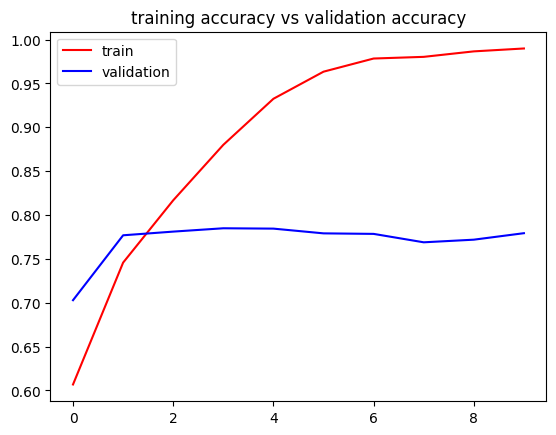

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('training accuracy vs validation accuracy')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

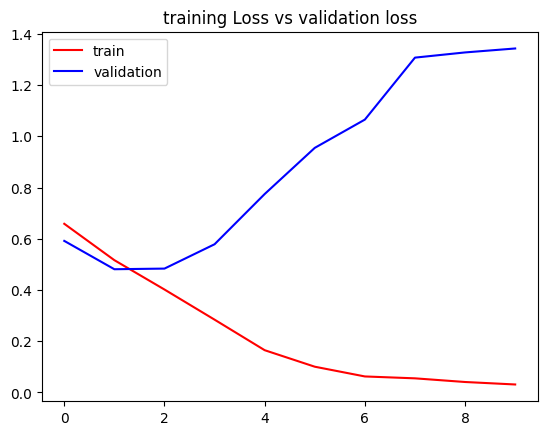

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('training Loss vs validation loss')
plt.legend()
plt.show

In [22]:
##Dropout
from keras.layers import Dropout,BatchNormalization

In [26]:

model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu' , padding='valid' , input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3), activation='relu' , padding='valid'))

model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3), activation='relu' , padding='valid' ))

model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))

model.add(Flatten())


model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation= 'sigmoid'))

In [27]:
model.compile(optimizer='adam',  loss = 'binary_crossentropy' , metrics = ['accuracy'])
history= model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 57s 89ms/step - loss: 0.6822 - accuracy: 0.5712 - val_loss: 0.6428 - val_accuracy: 0.6592
Epoch 2/10
625/625 [==============================] - 57s 92ms/step - loss: 0.5996 - accuracy: 0.6823 - val_loss: 0.5522 - val_accuracy: 0.7370
Epoch 3/10
625/625 [==============================] - 58s 93ms/step - loss: 0.4932 - accuracy: 0.7642 - val_loss: 0.4858 - val_accuracy: 0.7788
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3846 - accuracy: 0.8253 - val_loss: 0.5267 - val_accuracy: 0.7772
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.2708 - accuracy: 0.8852 - val_loss: 0.5890 - val_accuracy: 0.7828
Epoch 6/10
625/625 [==============================] - 60s 95ms/step - loss: 0.1680 - accuracy: 0.9345 - val_loss: 0.7724 - val_accuracy: 0.7808
Epoch 7/10
625/625 [==============================] - 61s 97ms/step - loss: 0.1180 - accuracy: 0.9553 - val_loss: 0.7991 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

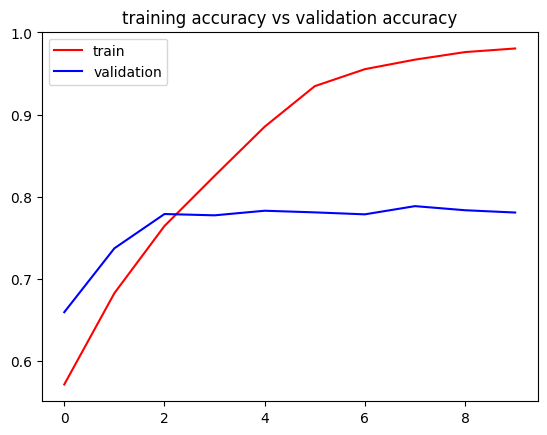

In [30]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('training accuracy vs validation accuracy')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

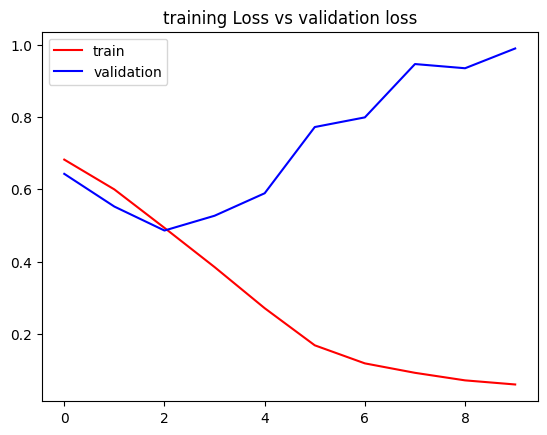

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('training Loss vs validation loss')
plt.legend()
plt.show

In [32]:
##BAtch normalization


In [37]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu' , padding='valid' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3), activation='relu' , padding='valid'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3), activation='relu' , padding='valid' ))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size= (2,2), strides= 2,padding='valid'))

model.add(Flatten())


model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation= 'sigmoid'))

In [38]:
train_ds= keras.utils.image_dataset_from_directory(
    directory= 'data/train',
    labels= 'inferred',
    label_mode= 'int',
    batch_size=16,  ### reducing the batch-size as Overflow of gpu memory is happening 
    image_size=(256,256)

    
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory= 'data/test',
    labels= 'inferred',
    label_mode= 'int',
    batch_size=16,### reducing the batch-size as Overflow of gpu memory is happening 
    image_size=(256,256)

    
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [39]:
model.compile(optimizer='adam',  loss = 'binary_crossentropy' , metrics = ['accuracy'])
history= model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
1250/1250 [==============================] - 83s 66ms/step - loss: 1.7410 - accuracy: 0.5433 - val_loss: 0.6662 - val_accuracy: 0.5852
Epoch 2/10
1250/1250 [==============================] - 85s 68ms/step - loss: 0.6379 - accuracy: 0.6489 - val_loss: 0.5290 - val_accuracy: 0.7478
Epoch 3/10
1250/1250 [==============================] - 86s 69ms/step - loss: 0.5723 - accuracy: 0.7110 - val_loss: 0.5330 - val_accuracy: 0.7310
Epoch 4/10
1250/1250 [==============================] - 87s 69ms/step - loss: 0.5180 - accuracy: 0.7498 - val_loss: 0.5241 - val_accuracy: 0.7418
Epoch 5/10
1250/1250 [==============================] - 87s 70ms/step - loss: 0.4534 - accuracy: 0.7918 - val_loss: 0.4568 - val_accuracy: 0.7774
Epoch 6/10
1250/1250 [==============================] - 87s 70ms/step - loss: 0.4007 - accuracy: 0.8203 - val_loss: 0.5845 - val_accuracy: 0.7198
Epoch 7/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.3464 - accuracy: 0.8497 - val_loss: 0.6710 -

<function matplotlib.pyplot.show(close=None, block=None)>

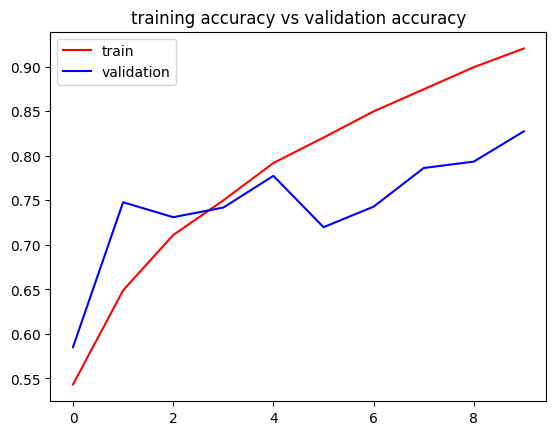

In [40]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('training accuracy vs validation accuracy')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

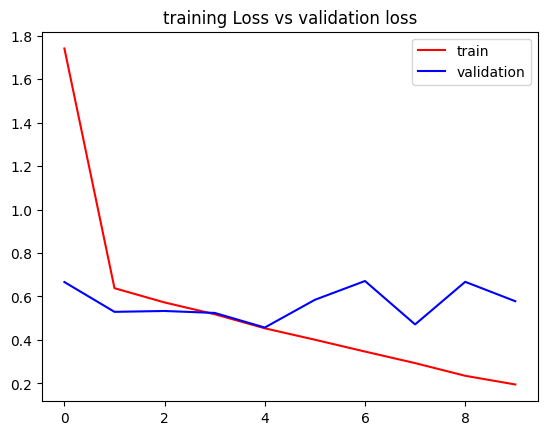

In [41]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('training Loss vs validation loss')
plt.legend()
plt.show

In [44]:
import cv2 as cv

In [53]:
test_img= cv.imread('dog1.jpg')

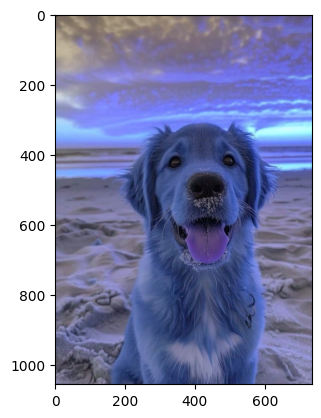

In [54]:
plt.imshow(test_img)

In [55]:
test_img.shape

(1057, 735, 3)

In [56]:
test_img= cv.resize(test_img, (256,256))

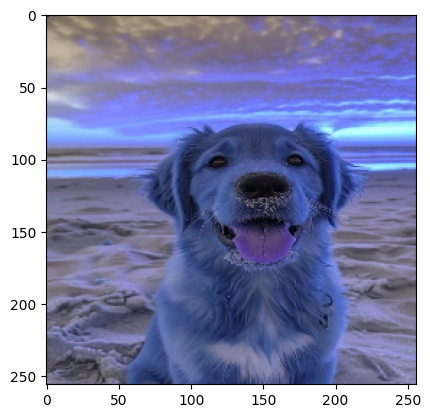

In [57]:
plt.imshow(test_img)

In [58]:
test_input= test_img.reshape((1,256,256,3))

In [59]:
model.predict(test_input)

array([[0.6808755]], dtype=float32)

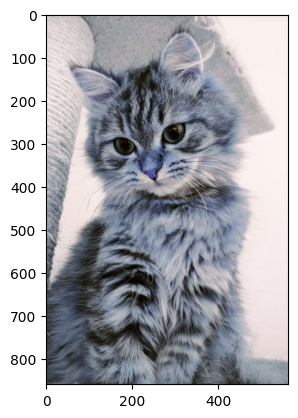

In [60]:
test_img= cv.imread('cat.jpg')
plt.imshow(test_img)

In [62]:
test_img.shape
test_img= cv.resize(test_img, (256,256))

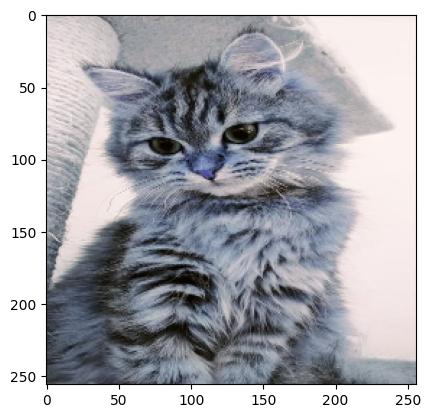

In [63]:
plt.imshow(test_img)

In [64]:
test_input= test_img.reshape((1,256,256,3))

In [65]:
model.predict(test_input)### since the answer is less than 0.5 its a cat. 

array([[0.00086365]], dtype=float32)

In [66]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']
